### 문제 1 : 데이터로드 및 탐색


In [65]:
import pandas as pd
import numpy as np


# 엑셀 파일 URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"

# 엑셀 파일 불러오기
df = pd.read_excel(url, sheet_name='Year 2009-2010')

print(df.head())
print(df.info())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invo

In [66]:
import pandas as pd

# 엑셀 파일 URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"

# 엑셀 파일 내 시트 목록 확인
xls = pd.ExcelFile(url, engine='openpyxl')
print(xls.sheet_names)


['Year 2009-2010', 'Year 2010-2011']


In [67]:
import pandas as pd

# 1. 엑셀 파일 URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"

# 2. 각각의 시트를 읽어오기
df_2009 = pd.read_excel(url, sheet_name='Year 2009-2010', engine='openpyxl')
df_2010 = pd.read_excel(url, sheet_name='Year 2010-2011', engine='openpyxl')

# 3. 두 데이터를 위로 이어붙이기 (세로로 합치기)
df = pd.concat([df_2009, df_2010], ignore_index=True)


In [68]:
# 4. 결과 확인
print(df.info())

print(df.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434  

In [69]:
# 결측치 확인
df.isnull().sum()


,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [70]:
df.isnull().values.any()

np.True_

### 문제 2 : 데이터 전처리
 1) InvoiceDate 컬럼을 날짜 형식으로 변환하고, Customer ID에 결측치가 있는 행을 제거

In [71]:
# 1. InvoiceDate를 datetime 형식으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 2. Customer ID가 결측치(NaN)인 행 제거
df = df.dropna(subset=['Customer ID'])

# 3. 결과 확인
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB
None


In [72]:
# 결측치있는 Customer ID 제거 후 확인
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


### 문제 2 : 데이터 전처리
 2) Customer ID를 정수형으로 변환한 후, InvoiceDate를 기준으로 데이터를 정렬하세요.

In [73]:
# 1. Customer ID를 정수형(int)으로 변환
df['Customer ID'] = df['Customer ID'].astype(int)

# 2. InvoiceDate를 기준으로 오름차순 정렬
df = df.sort_values(by='InvoiceDate', ascending=True)

# 3. 결과 확인
print(df.head())
print(df.info())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95        13085  United Kingdom  
1 2009-12-01 07:45:00   6.75        13085  United Kingdom  
2 2009-12-01 07:45:00   6.75        13085  United Kingdom  
3 2009-12-01 07:45:00   2.10        13085  United Kingdom  
4 2009-12-01 07:45:00   1.25        13085  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice 

### 문제 2 : 데이터 전처리
3) 금액을 나타내는 새로운 컬럼 Total 을 생성하세요 (Quantity와 Price를 곱한 값).

In [74]:
# Quantity와 Price를 곱하여 Total 컬럼 생성
df['Total'] = df['Quantity'] * df['Price']

# 결과 확인
print(df[['Quantity', 'Price', 'Total']].head(3))

df.head(3)


   Quantity  Price  Total
0        12   6.95   83.4
1        12   6.75   81.0
2        12   6.75   81.0


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0


### **문제 3: 나라별 구매 인원 시각화**

- **`Country`** 컬럼을 기준으로 **`Customer ID`**의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요

In [75]:
import matplotlib.pyplot as plt

# 1. 나라별(Customer ID 유니크 수) 계산
country_customer_counts = df.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)

# 2. 결과 확인
print(country_customer_counts)



Country
United Kingdom          5410
Germany                  107
France                    95
Spain                     41
Belgium                   29
Portugal                  24
Netherlands               23
Switzerland               22
Sweden                    19
Italy                     17
Finland                   15
Australia                 15
Channel Islands           14
Norway                    13
Austria                   13
Denmark                   12
Cyprus                    11
Japan                     10
USA                        9
Unspecified                7
Poland                     6
Greece                     5
EIRE                       5
Canada                     5
Israel                     4
United Arab Emirates       4
Malta                      2
Bahrain                    2
Brazil                     2
RSA                        2
Korea                      2
Czech Republic             1
Iceland                    1
Lebanon                    1
Lithua

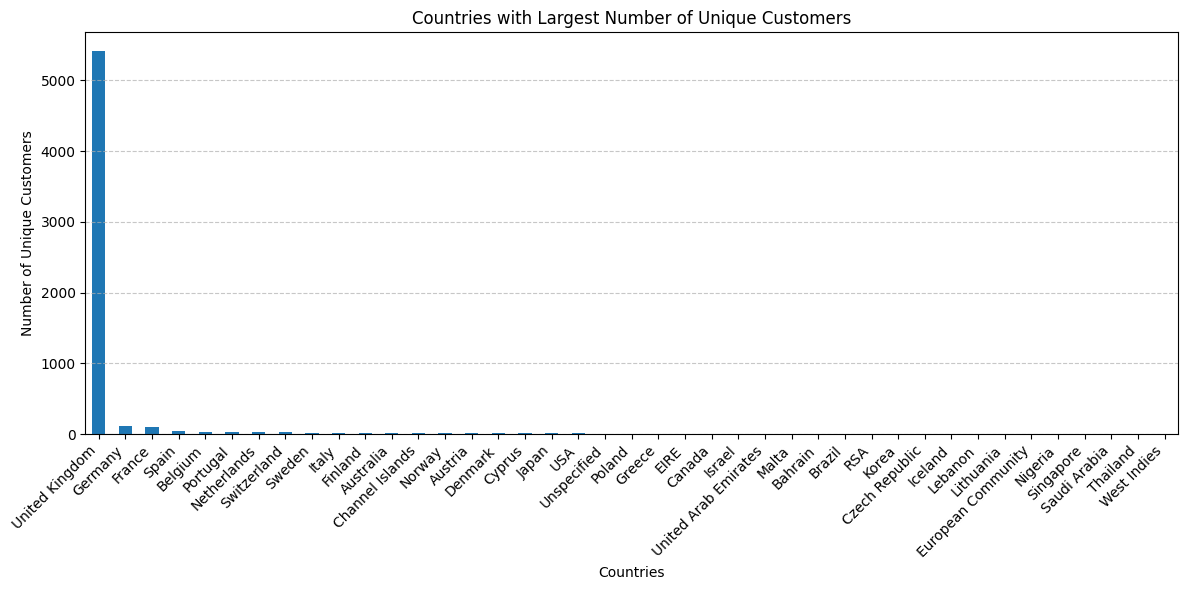

In [76]:
# 3. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
country_customer_counts.plot(kind='bar')

plt.title('Countries with Largest Number of Unique Customers')
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


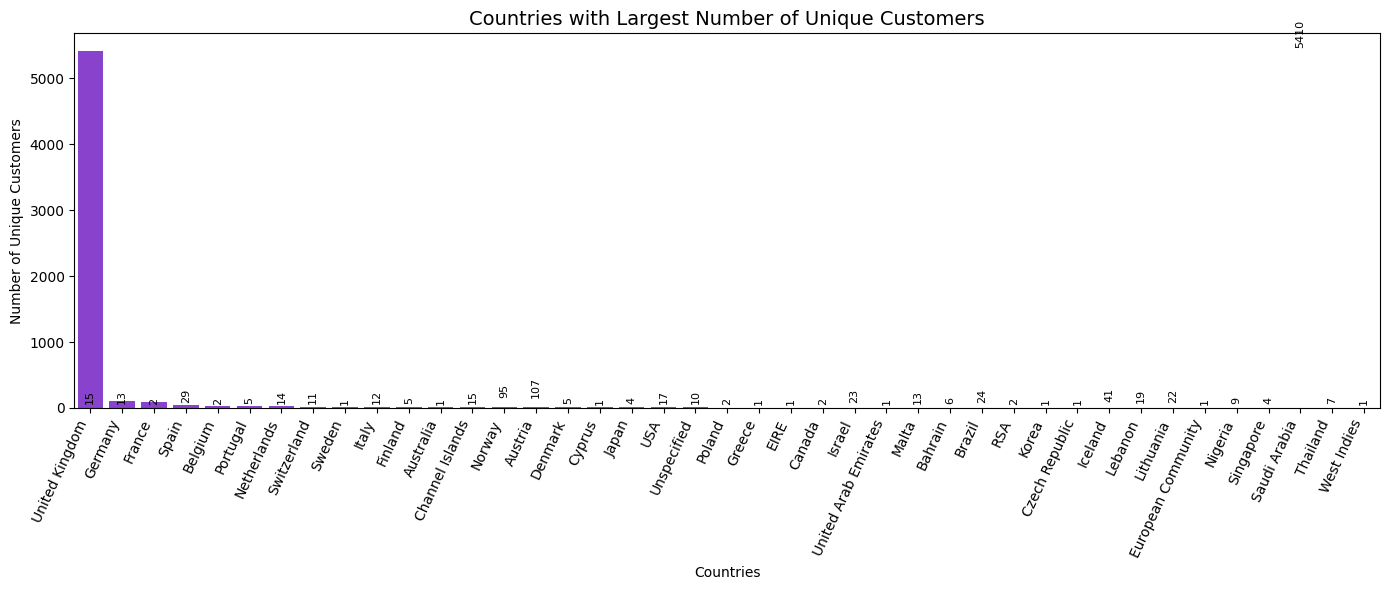

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 나라별 고유 고객 수 계산
country_customer_counts = df.groupby('Country')['Customer ID'].nunique().reset_index()
country_customer_counts = country_customer_counts.sort_values(by='Customer ID', ascending=False)

# 2. 시각화
plt.figure(figsize=(14,6))
sns.barplot(data=country_customer_counts, x='Country', y='Customer ID', color='blueviolet')

# 3. 상단 수치 레이블 추가
for index, row in country_customer_counts.iterrows():
    plt.text(index, row['Customer ID'] + 50, str(row['Customer ID']),
             ha='center', va='bottom', fontsize=8, rotation=90)


# 4. 제목 및 축 설정
plt.title("Countries with Largest Number of Unique Customers", fontsize=14)
plt.xlabel("Countries")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=65, ha='right')
plt.tight_layout()
plt.show()


### **문제 4: Acquisition (고객 유입 분석)**

- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.

- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 고객별 첫 구매 날짜 계산
first_purchase = df.groupby('Customer ID')['InvoiceDate'].min().reset_index()
first_purchase


,Customer ID,InvoiceDate
0,12346,2009-12-14 08:34:00
1,12347,2010-10-31 14:20:00
2,12348,2010-09-27 14:59:00
3,12349,2009-12-04 12:49:00
4,12350,2011-02-02 16:01:00
...,...,...
5937,18283,2010-02-19 17:16:00
5938,18284,2010-10-04 11:33:00
5939,18285,2010-02-17 10:24:00
5940,18286,2009-12-16 10:45:00


In [79]:
# 2. 연월(YYYY-MM) 포맷으로 변환

first_purchase['YearMonth'] = first_purchase['InvoiceDate'].dt.to_period('M').astype(str)
first_purchase

,Customer ID,InvoiceDate,YearMonth
0,12346,2009-12-14 08:34:00,2009-12
1,12347,2010-10-31 14:20:00,2010-10
2,12348,2010-09-27 14:59:00,2010-09
3,12349,2009-12-04 12:49:00,2009-12
4,12350,2011-02-02 16:01:00,2011-02
...,...,...,...
5937,18283,2010-02-19 17:16:00,2010-02
5938,18284,2010-10-04 11:33:00,2010-10
5939,18285,2010-02-17 10:24:00,2010-02
5940,18286,2009-12-16 10:45:00,2009-12


In [80]:
# 3. 월별 신규 고객 수 계산
monthly_new_customers = first_purchase['YearMonth'].value_counts().sort_index()
monthly_new_customers


,count
YearMonth,
2009-12,1045
2010-01,394
2010-02,363
2010-03,436
2010-04,291
2010-05,254
2010-06,269
2010-07,183
2010-08,158


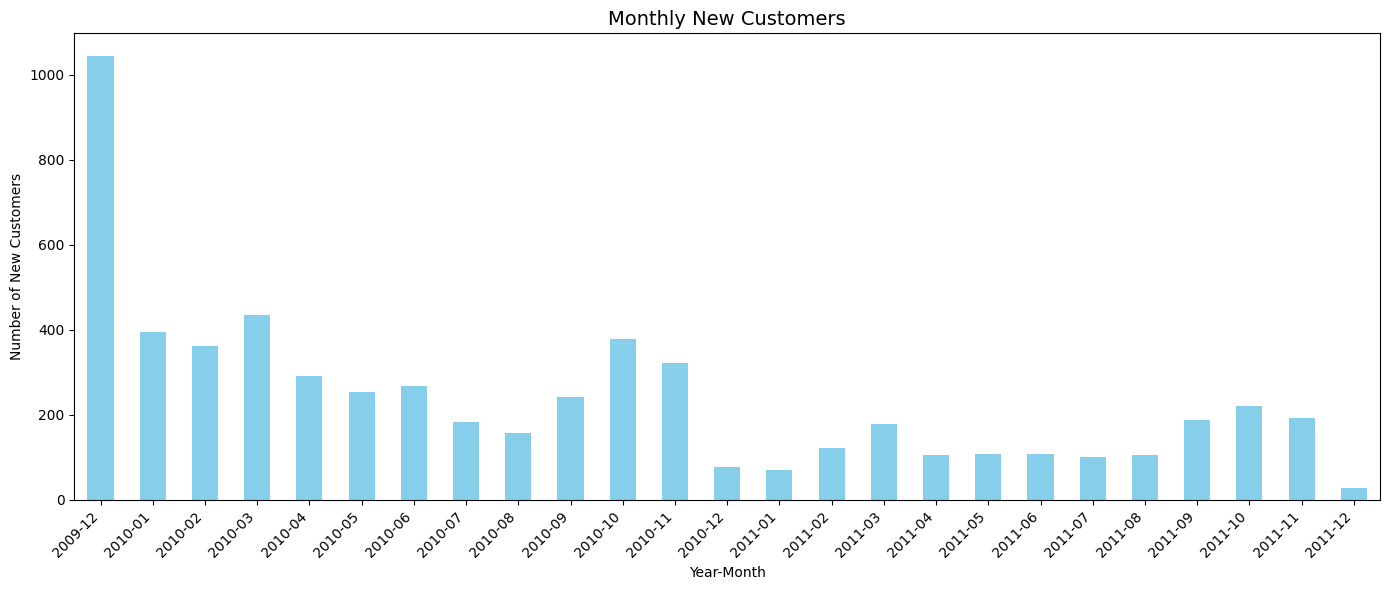

In [81]:
# 5. 시각화 : 월별 신규 고객 수

plt.figure(figsize=(14,6))
monthly_new_customers.plot(kind='bar', color='skyblue')

plt.title('Monthly New Customers', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **문제 5: Activation (고객 활성화 분석)**

- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.

- 전체 고객 수와 활성화된 고객 수를 비교하여 활성화율을 도출하세요.

In [134]:
import pandas as pd

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   Total        824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 62.9+ MB


In [135]:
first_purchase_date.head(3)

,InvoiceDate
Customer ID,
12346,2009-12-14 08:34:00
12347,2010-10-31 14:20:00
12348,2010-09-27 14:59:00


In [136]:
# df 파일을 df5에 저장 : df5에서 작업함
df5 = df
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   Total        824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 62.9+ MB


In [137]:
# 고객별 첫 구매일 계산 (DataFrame 형태로 유지)
first_purchase_df5 = df5.groupby('Customer ID', as_index=False)['InvoiceDate'].min()
first_purchase_df5.columns = ['Customer ID', 'FirstPurchaseDate']

first_purchase_df5.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        5942 non-null   int64         
 1   FirstPurchaseDate  5942 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 93.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   Total

In [138]:
# first_purchase_df5와 df5 병합

# 병합 대상에서 'Customer ID'와 'FirstPurchaseDate'만 선택
df5 = df5.merge(
    first_purchase_df5[['Customer ID', 'FirstPurchaseDate']],
    on='Customer ID',
    how='left',
    suffixes=('', '')
)

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 62.9+ MB


In [139]:
# 1. 고객별 총 구매 금액 계산
customer_total = df5.groupby('Customer ID')['Total'].sum().reset_index()
customer_total

,Customer ID,Total
0,12346,-64.68
1,12347,5633.32
2,12348,2019.40
3,12349,4404.54
4,12350,334.40
...,...,...
5937,18283,2736.65
5938,18284,436.68
5939,18285,427.00
5940,18286,1188.43


In [140]:
# 2. 활성화 여부 컬럼 추가 (총 구매액이 £50 이상이면 True)
customer_total['Activated'] = customer_total['Total'] >= 50

# 3. 결과 확인
print(customer_total.head())


   Customer ID    Total  Activated
0        12346   -64.68      False
1        12347  5633.32       True
2        12348  2019.40       True
3        12349  4404.54       True
4        12350   334.40       True


In [141]:
# 전체 고객 수
total_customers = customer_total.shape[0]
total_customers



5942

In [142]:
# 활성화된 고객 수
activated_customers = customer_total[customer_total['Activated']].shape[0]
activated_customers


5777

In [143]:
# 활성화율 계산 (% 단위로 소수 둘째 자리까지)
activation_rate = round((activated_customers / total_customers) * 100, 2)
activation_rate

97.22

In [147]:
# 결과 출력
print(f'총 고객 수: {total_customers}')
print(f'활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): {activated_customers}')
print(f'고객 활성화율: {activation_rate}%')

총 고객 수: 5942
활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): 5777
고객 활성화율: 97.22%


### **문제 6: Retention:코호트 분석(고객)**

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

In [148]:
# 1. InvoiceDate에서 연-월 추출
df5['OrderMonth'] = df5['InvoiceDate'].dt.to_period('M')

df5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
 10  OrderMonth         824364 non-null  period[M]     
dtypes: datetime64[ns](2), float64(2), int64(2), object(4), period[M](1)
memory usage: 69.2+ MB


In [149]:
# 2. 고객별 첫 구매 월 구하기
first_purchase = df5.groupby('Customer ID')['OrderMonth'].min()
df5['CohortMonth'] = df5['Customer ID'].map(first_purchase)

df5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
 10  OrderMonth         824364 non-null  period[M]     
 11  CohortMonth        824364 non-null  period[M]     
dtypes: datetime64[ns](2), float64(2), int64(2), object(4), period[M](2)
memory usage: 75.5+ MB


In [150]:
# 3. CohortMonth별 각 주문 월(OrderMonth)의 고객 수 계산
cohort_pivot = df5.groupby(['CohortMonth', 'OrderMonth'])['Customer ID'].nunique().reset_index()

cohort_pivot

,CohortMonth,OrderMonth,Customer ID
0,2009-12,2009-12,1045
1,2009-12,2010-01,392
2,2009-12,2010-02,358
3,2009-12,2010-03,447
4,2009-12,2010-04,410
...,...,...,...
320,2011-10,2011-11,74
321,2011-10,2011-12,39
322,2011-11,2011-11,192
323,2011-11,2011-12,33


In [151]:
cohort_pivot = cohort_pivot.pivot(index='CohortMonth', columns='OrderMonth', values='Customer ID')

cohort_pivot

OrderMonth,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,...,319.0,273.0,316.0,303.0,287.0,274.0,332.0,319.0,427.0,218.0
2010-01,NaN,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,...,71.0,60.0,86.0,74.0,69.0,73.0,93.0,73.0,88.0,29.0
2010-02,NaN,NaN,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,...,70.0,49.0,74.0,67.0,61.0,53.0,85.0,90.0,62.0,23.0
2010-03,NaN,NaN,NaN,436.0,95.0,113.0,103.0,100.0,87.0,105.0,...,84.0,72.0,83.0,74.0,76.0,69.0,74.0,89.0,93.0,33.0
2010-04,NaN,NaN,NaN,NaN,291.0,67.0,58.0,47.0,54.0,67.0,...,42.0,40.0,47.0,46.0,43.0,41.0,41.0,50.0,61.0,19.0
2010-05,NaN,NaN,NaN,NaN,NaN,254.0,49.0,45.0,49.0,48.0,...,31.0,35.0,38.0,41.0,27.0,33.0,36.0,42.0,40.0,12.0
2010-06,NaN,NaN,NaN,NaN,NaN,NaN,269.0,58.0,53.0,55.0,...,32.0,28.0,38.0,42.0,35.0,30.0,33.0,37.0,55.0,16.0
2010-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.0,38.0,37.0,...,26.0,22.0,25.0,29.0,25.0,26.0,37.0,32.0,45.0,17.0
2010-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.0,39.0,...,22.0,23.0,21.0,22.0,20.0,27.0,32.0,29.0,32.0,11.0


In [152]:
# 4. 각 Cohort의 첫 달 고객 수로 나누어 비율 계산

cohort_size = cohort_pivot.iloc[:, 0]    # 첫 번째 열: 각 Cohort의 첫 달 고객 수

cohort_size


,2009-12
CohortMonth,
2009-12,1045.0
2010-01,NaN
2010-02,NaN
2010-03,NaN
2010-04,NaN
2010-05,NaN
2010-06,NaN
2010-07,NaN
2010-08,NaN


In [153]:
retention_rate = cohort_pivot.divide(cohort_size, axis=0) * 100  # 비율 계산 (백분율)

retention_rate

OrderMonth,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,100.0,37.511962,34.258373,42.77512,39.23445,39.043062,39.043062,35.789474,33.971292,37.511962,...,30.526316,26.124402,30.239234,28.995215,27.464115,26.220096,31.770335,30.526316,40.861244,20.861244
2010-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


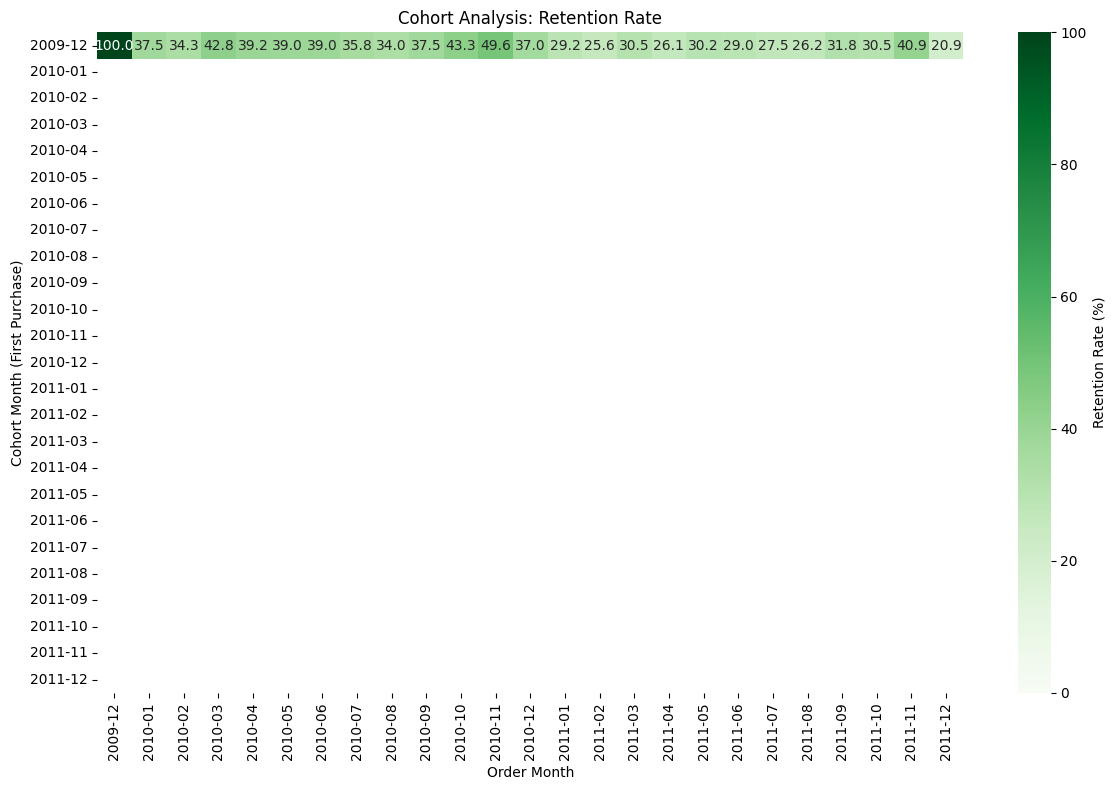

In [154]:
# 5. 히트맵 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(retention_rate, annot=True, fmt=".1f", cmap="Greens", vmin=0, vmax=100,
            cbar_kws={'label': 'Retention Rate (%)'})

plt.title("Cohort Analysis: Retention Rate")
plt.xlabel("Order Month")
plt.ylabel("Cohort Month (First Purchase)")

plt.tight_layout()
plt.show()


## 6번 문제 (2) 다시 코딩-분기별

In [164]:
# df5의  이 전 실행에서 생성되 컬럼 삭제
# df5 = df5.drop(columns=['OrderMonth', 'CohortMonth', 'OrderQuarter'])

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 62.9+ MB


In [166]:
print(df5.columns)

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Total', 'FirstPurchaseDate'],
      dtype='object')


In [167]:
# 분기 단위로 변환 (월 → 분기)
df5['OrderQuarter'] = df5['InvoiceDate'].dt.to_period('Q')

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
 10  OrderQuarter       824364 non-null  period[Q-DEC] 
dtypes: datetime64[ns](2), float64(2), int64(2), object(4), period[Q-DEC](1)
memory usage: 69.2+ MB


In [168]:
df5['CohortQuarter'] = df5.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('Q')

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
 10  OrderQuarter       824364 non-null  period[Q-DEC] 
 11  CohortQuarter      824364 non-null  period[Q-DEC] 
dtypes: datetime64[ns](2), float64(2), int64(2), object(4), period[Q-DEC](2)
memory usage: 75.5+ MB


In [169]:
# 분기별 Cohort 테이블 만들기
cohort_data = df5.groupby(['CohortQuarter', 'OrderQuarter'])['Customer ID'].nunique().reset_index()
cohort_data

,CohortQuarter,OrderQuarter,Customer ID
0,2009Q4,2009Q4,1045
1,2009Q4,2010Q1,673
2,2009Q4,2010Q2,688
3,2009Q4,2010Q3,619
4,2009Q4,2010Q4,714
5,2009Q4,2011Q1,525
6,2009Q4,2011Q2,517
7,2009Q4,2011Q3,509
8,2009Q4,2011Q4,572
9,2010Q1,2010Q1,1193


In [170]:
cohort_pivot = cohort_data.pivot(index='CohortQuarter', columns='OrderQuarter', values='Customer ID')
cohort_pivot

OrderQuarter,2009Q4,2010Q1,2010Q2,2010Q3,2010Q4,2011Q1,2011Q2,2011Q3,2011Q4
CohortQuarter,,,,,,,,,
2009Q4,1045.0,673.0,688.0,619.0,714.0,525.0,517.0,509.0,572.0
2010Q1,NaN,1193.0,610.0,573.0,608.0,416.0,431.0,444.0,408.0
2010Q2,NaN,NaN,814.0,324.0,348.0,183.0,245.0,227.0,244.0
2010Q3,NaN,NaN,NaN,583.0,281.0,148.0,155.0,192.0,188.0
2010Q4,NaN,NaN,NaN,NaN,778.0,168.0,196.0,162.0,275.0
2011Q1,NaN,NaN,NaN,NaN,NaN,372.0,159.0,125.0,136.0
2011Q2,NaN,NaN,NaN,NaN,NaN,NaN,321.0,142.0,127.0
2011Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395.0,210.0
2011Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441.0


In [171]:
# 첫 분기의 고객 수로 나누어 유지율 계산
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size


,2009Q4
CohortQuarter,
2009Q4,1045.0
2010Q1,NaN
2010Q2,NaN
2010Q3,NaN
2010Q4,NaN
2011Q1,NaN
2011Q2,NaN
2011Q3,NaN
2011Q4,NaN


In [172]:
retention_rate = cohort_pivot.divide(cohort_size, axis=0) * 100
retention_rate

OrderQuarter,2009Q4,2010Q1,2010Q2,2010Q3,2010Q4,2011Q1,2011Q2,2011Q3,2011Q4
CohortQuarter,,,,,,,,,
2009Q4,100.0,64.401914,65.837321,59.23445,68.325359,50.239234,49.473684,48.708134,54.736842
2010Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


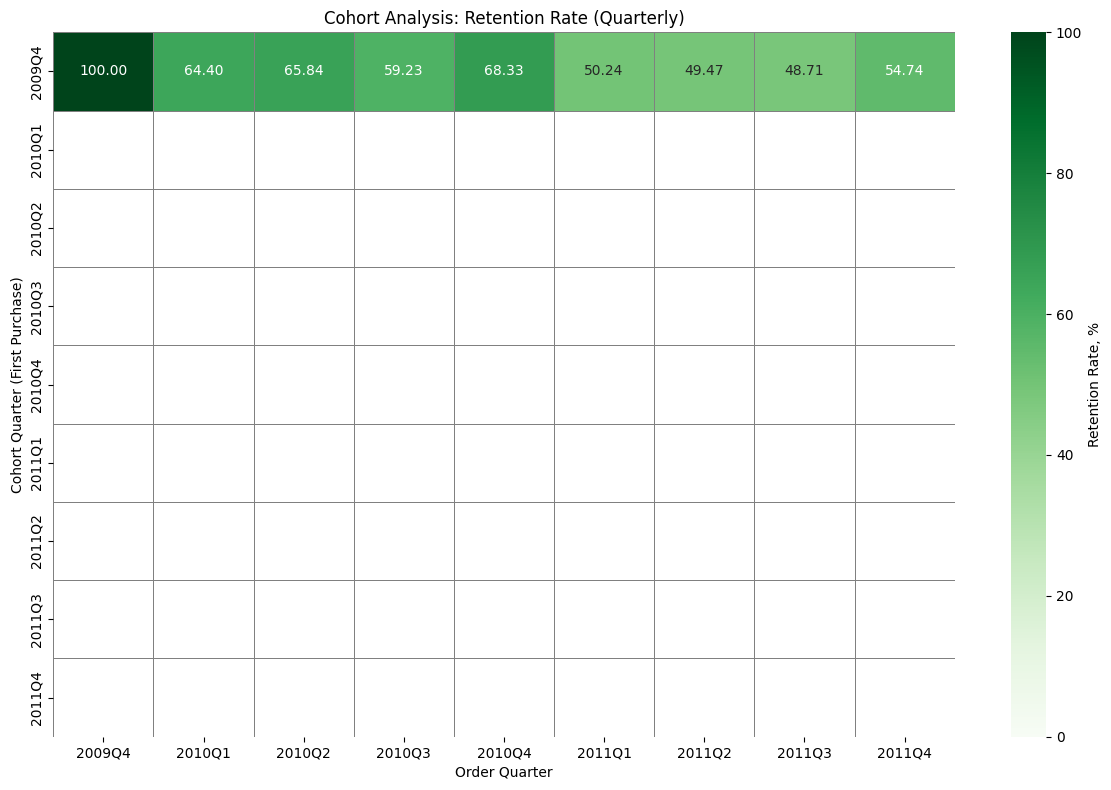

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    retention_rate,
    annot=True,
    fmt=".2f",
    cmap="Greens",
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"label": "Retention Rate, %"},
    vmin=0, vmax=100
)

plt.title("Cohort Analysis: Retention Rate (Quarterly)")
plt.xlabel("Order Quarter")
plt.ylabel("Cohort Quarter (First Purchase)")

plt.tight_layout()
plt.show()


## 6번 문제(3) 다시 코딩-분기별
- CohortIndex 기반의 계단형(대각선 형태) 코호트 유지율 분석 결과를 얻으려면,

- 현재 OrderQuarter 기준이 아닌,
- "첫 구매 이후 몇 번째 분기인지"를 기준으로 처리

In [187]:
# 기존 df5 컬럼 확인
df5.info()

df5.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
 10  OrderQuarter       824364 non-null  period[Q-DEC] 
 11  CohortQuarter      824364 non-null  period[Q-DEC] 
dtypes: datetime64[ns](2), float64(2), int64(2), object(4), period[Q-DEC](2)
memory usage: 75.5+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,FirstPurchaseDate,OrderQuarter,CohortQuarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12-01 07:45:00,2009Q4,2009Q4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01 07:45:00,2009Q4,2009Q4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01 07:45:00,2009Q4,2009Q4


In [178]:
# df5의  이전 실행에서 생성된 컬럼 삭제
df5 = df5.drop(columns=['OrderQuarter', 'CohortQuarter'])

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 62.9+ MB


In [179]:
# 1. CohortQuarter 및 OrderQuarter 정의

df5['OrderQuarter'] = df5['InvoiceDate'].dt.to_period('Q')
df5['CohortQuarter'] = df5.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('Q')

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
 10  OrderQuarter       824364 non-null  period[Q-DEC] 
 11  CohortQuarter      824364 non-null  period[Q-DEC] 
dtypes: datetime64[ns](2), float64(2), int64(2), object(4), period[Q-DEC](2)
memory usage: 75.5+ MB


In [183]:
df5['OrderQuarter'].head(3)


,CohortQuarter
0,2009Q4
1,2009Q4
2,2009Q4


In [184]:
df5['OrderQuarter'].head(3).unique()

<PeriodArray>
['2009Q4']
Length: 1, dtype: period[Q-DEC]

In [185]:
df5['CohortQuarter'].head(3)

,CohortQuarter
0,2009Q4
1,2009Q4
2,2009Q4


In [186]:
df5['CohortQuarter'].head(3).unique()

<PeriodArray>
['2009Q4']
Length: 1, dtype: period[Q-DEC]

In [192]:
 # 2. CohortIndex 계산 (첫 구매 이후 몇 분기인지)

def get_quarter_index(series):
    return series.dt.year * 4 + series.dt.quarter

# 정수로 변환 후 차이 계산
order_quarter_int = get_quarter_index(df5['OrderQuarter'])
cohort_quarter_int = get_quarter_index(df5['CohortQuarter'])

df5['CohortIndex'] = order_quarter_int - cohort_quarter_int


df5.info()
df5.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
 10  OrderQuarter       824364 non-null  period[Q-DEC] 
 11  CohortQuarter      824364 non-null  period[Q-DEC] 
 12  CohortIndex        824364 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,FirstPurchaseDate,OrderQuarter,CohortQuarter,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12-01 07:45:00,2009Q4,2009Q4,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01 07:45:00,2009Q4,2009Q4,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01 07:45:00,2009Q4,2009Q4,0


In [196]:
#3. Cohort별 고객 수 계산

cohort_grouped = df5.groupby(['CohortQuarter', 'CohortIndex'])['Customer ID'].nunique().reset_index()

retention_table = cohort_grouped.pivot(index='CohortQuarter', columns='CohortIndex', values='Customer ID')

retention_table


CohortIndex,0,1,2,3,4,5,6,7,8
CohortQuarter,,,,,,,,,
2009Q4,1045.0,673.0,688.0,619.0,714.0,525.0,517.0,509.0,572.0
2010Q1,1193.0,610.0,573.0,608.0,416.0,431.0,444.0,408.0,NaN
2010Q2,814.0,324.0,348.0,183.0,245.0,227.0,244.0,NaN,NaN
2010Q3,583.0,281.0,148.0,155.0,192.0,188.0,NaN,NaN,NaN
2010Q4,778.0,168.0,196.0,162.0,275.0,NaN,NaN,NaN,NaN
2011Q1,372.0,159.0,125.0,136.0,NaN,NaN,NaN,NaN,NaN
2011Q2,321.0,142.0,127.0,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,395.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,441.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
# 4. Retention Rate 계산


# 첫 분기의 고객 수 (CohortIndex == 0)
cohort_size = retention_table.iloc[:, 0]

cohort_size

,0
CohortQuarter,
2009Q4,1045.0
2010Q1,1193.0
2010Q2,814.0
2010Q3,583.0
2010Q4,778.0
2011Q1,372.0
2011Q2,321.0
2011Q3,395.0
2011Q4,441.0


In [198]:
# 비율 계산 (%)
retention = retention_table.divide(cohort_size, axis=0) * 100
retention

CohortIndex,0,1,2,3,4,5,6,7,8
CohortQuarter,,,,,,,,,
2009Q4,100.0,64.401914,65.837321,59.234450,68.325359,50.239234,49.473684,48.708134,54.736842
2010Q1,100.0,51.131601,48.030176,50.963956,34.870075,36.127410,37.217100,34.199497,NaN
2010Q2,100.0,39.803440,42.751843,22.481572,30.098280,27.886978,29.975430,NaN,NaN
2010Q3,100.0,48.198971,25.385935,26.586621,32.933105,32.246998,NaN,NaN,NaN
2010Q4,100.0,21.593830,25.192802,20.822622,35.347044,NaN,NaN,NaN,NaN
2011Q1,100.0,42.741935,33.602151,36.559140,NaN,NaN,NaN,NaN,NaN
2011Q2,100.0,44.236760,39.563863,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,100.0,53.164557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


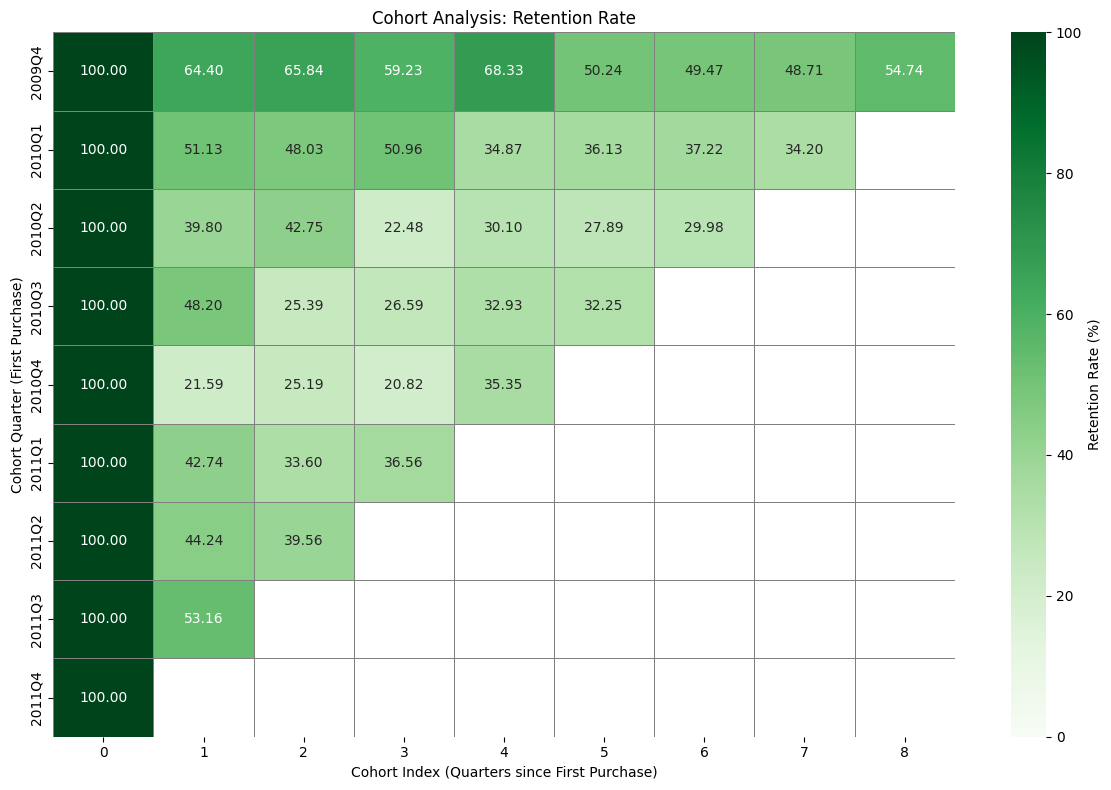

In [199]:
# 5. 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    data=retention,
    annot=True,
    fmt=".2f",
    cmap="Greens",
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={'label': 'Retention Rate (%)'},
    vmin=0,
    vmax=100
)

plt.title("Cohort Analysis: Retention Rate")
plt.xlabel("Cohort Index (Quarters since First Purchase)")
plt.ylabel("Cohort Quarter (First Purchase)")

plt.tight_layout()
plt.show()


### **문제 7: Retention: 코호트 분석(평균 구매수량)**

- 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
    - 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

In [202]:
 ## 1. CohortQuarter, CohortIndex 생성 (이미 6번에서 생성되었으면 생략 가능)

 # 첫 구매 시점
df5['CohortQuarter'] = df5.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('Q')

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
 10  OrderQuarter       824364 non-null  period[Q-DEC] 
 11  CohortQuarter      824364 non-null  period[Q-DEC] 
 12  CohortIndex        824364 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), 

In [205]:
df5['CohortQuarter'].head().unique()

<PeriodArray>
['2009Q4']
Length: 1, dtype: period[Q-DEC]

In [207]:
df5['CohortQuarter'].unique()

<PeriodArray>
['2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2',
 '2011Q3', '2011Q4']
Length: 9, dtype: period[Q-DEC]

In [209]:
# 현재 주문 시점
df5['OrderQuarter'] = df5['InvoiceDate'].dt.to_period('Q')

df5['OrderQuarter'].unique()

<PeriodArray>
['2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2',
 '2011Q3', '2011Q4']
Length: 9, dtype: period[Q-DEC]

In [220]:
# 정수 분기로 변환
def get_quarter_index(series):
    return series.dt.year * 4 + series.dt.quarter

order_quarter_int = get_quarter_index(df5['InvoiceDate'])
cohort_quarter_int = get_quarter_index(df5['CohortQuarter'].dt.to_timestamp())


In [221]:
# 첫 구매 이후 몇 번째 분기인지 계산
df5['CohortIndex'] = order_quarter_int - cohort_quarter_int

df5['CohortIndex'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [ ]:
# 2. Cohort별 평균 구매수량 계산

In [222]:
# 각 CohortQuarter와 CohortIndex 조합에서 평균 구매수량 계산
cohort_quantity = df5.groupby(['CohortQuarter', 'CohortIndex'])['Quantity'].mean().reset_index()

# 피벗 테이블로 전환
average_quantity = cohort_quantity.pivot(index='CohortQuarter', columns='CohortIndex', values='Quantity')


In [ ]:
#3. 히트맵 시각화

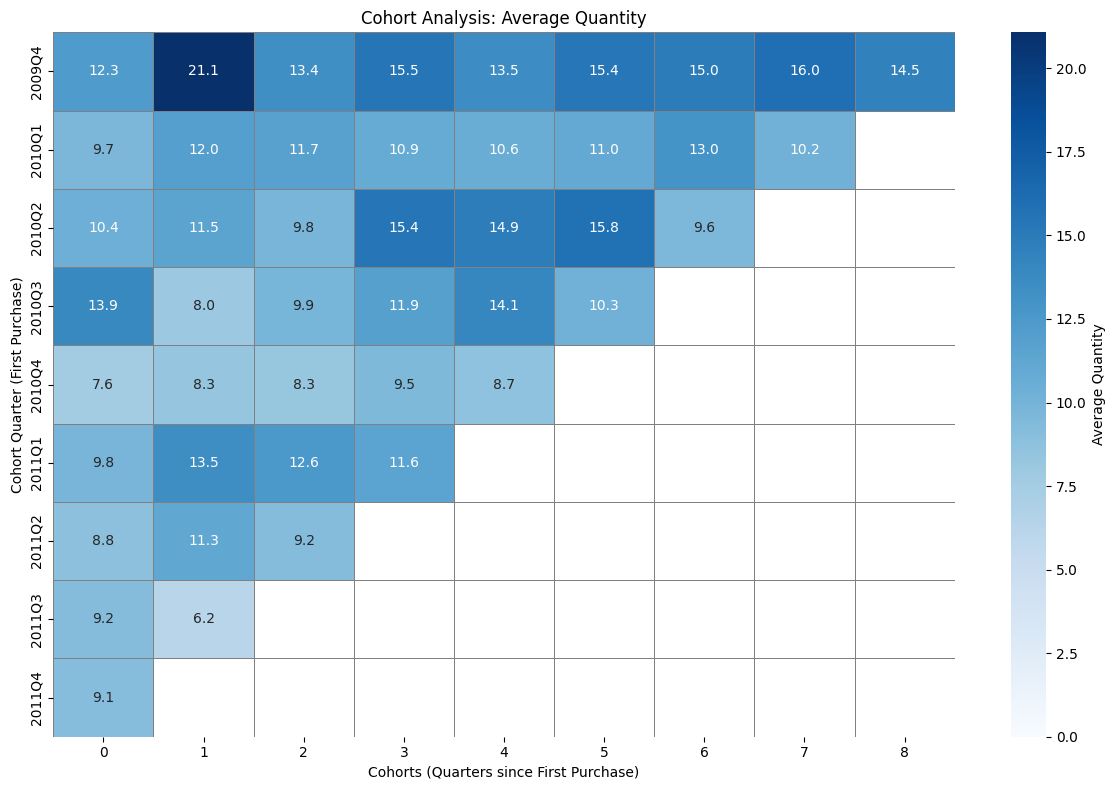

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(
    data=average_quantity,
    annot=True,              # 셀 값 표시
    fmt=".1f",               # 소수점 한 자리
    cmap="Blues",            # 파란색 계열 팔레트
    cbar_kws={'label': 'Average Quantity'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0
)

plt.title("Cohort Analysis: Average Quantity")
plt.xlabel("Cohorts (Quarters since First Purchase)")
plt.ylabel("Cohort Quarter (First Purchase)")

plt.tight_layout()
plt.show()


### **문제 8: Revenue : ARPU**

- 각 고객의 월별 **구매 금액**을 집계하고, 이를 기반으로 **ARPU**를 분석하세요.

In [224]:
df5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
 10  OrderQuarter       824364 non-null  period[Q-DEC] 
 11  CohortQuarter      824364 non-null  period[Q-DEC] 
 12  CohortIndex        824364 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(1), 

In [225]:
# 1. 구매 월 추출 (연-월 단위)

df5['OrderMonth'] = df5['InvoiceDate'].dt.to_period('M')

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
 10  OrderQuarter       824364 non-null  period[Q-DEC] 
 11  CohortQuarter      824364 non-null  period[Q-DEC] 
 12  CohortIndex        824364 non-null  int32         
 13  OrderMonth         824364 non-null  period[M

In [232]:
#2. 월별 총 매출과 사용자 수 계산

# 월별 총 매출
monthly_revenue = df5.groupby('OrderMonth')['Total'].sum()
monthly_revenue


,Total
OrderMonth,
2009-12,663272.050
2010-01,531952.902
2010-02,489399.586
2010-03,635996.481
2010-04,560635.022
2010-05,559924.550
2010-06,571459.910
2010-07,562785.900
2010-08,587256.460


In [233]:
# 월별 사용자 수 (고유 고객 수)
monthly_users = df5.groupby('OrderMonth')['Customer ID'].nunique()

monthly_users

,Customer ID
OrderMonth,
2009-12,1045
2010-01,786
2010-02,807
2010-03,1111
2010-04,998
2010-05,1062
2010-06,1095
2010-07,988
2010-08,964


In [234]:
# 3. 월별 ARPU 계산

# ARPU = 총 매출 / 고객 수
arpu = (monthly_revenue / monthly_users).round(2)

arpu

,0
OrderMonth,
2009-12,634.71
2010-01,676.78
2010-02,606.44
2010-03,572.45
2010-04,561.76
2010-05,527.24
2010-06,521.88
2010-07,569.62
2010-08,609.19


In [235]:
# 4. 시계열 정렬을 위해 datetime으로 변환

arpu.index = arpu.index.to_timestamp()      # PeriodIndex → Timestamp

arpu.index

DatetimeIndex(['2009-12-01', '2010-01-01', '2010-02-01', '2010-03-01',
               '2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01',
               '2010-08-01', '2010-09-01', '2010-10-01', '2010-11-01',
               '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01'],
              dtype='datetime64[ns]', name='OrderMonth', freq='MS')

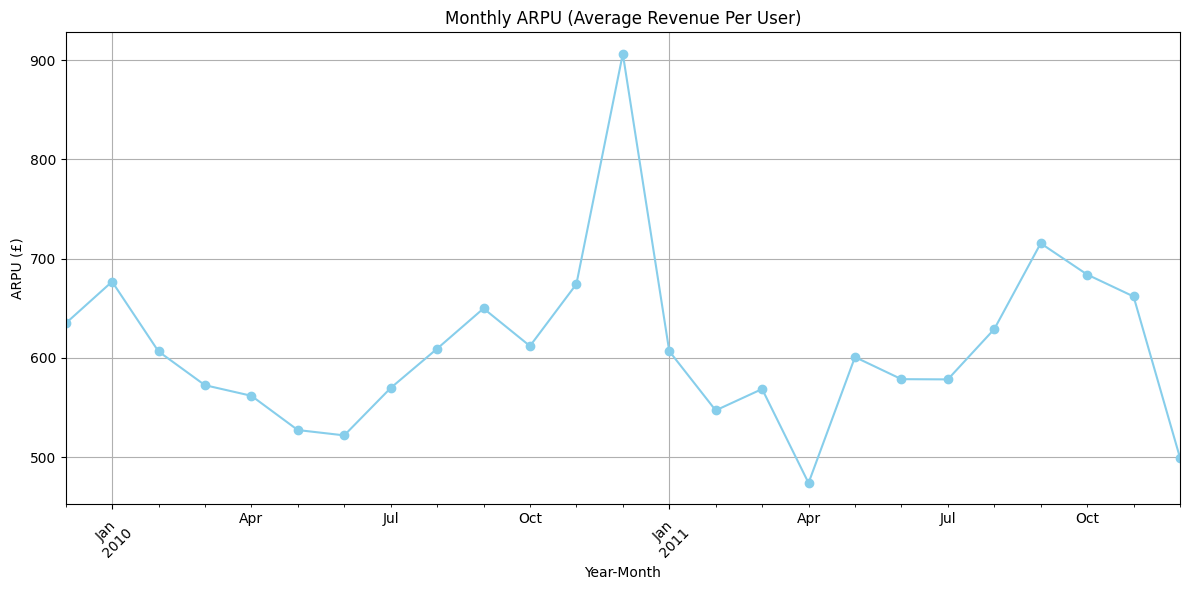

In [236]:
# 5. 시각화

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
arpu.plot(kind='line', marker='o', color='skyblue')

plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



### **문제 9: Revenue(CLV)**

- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)

In [237]:
# 지금까지 데이터 파일  구조 확인

df5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Total              824364 non-null  float64       
 9   FirstPurchaseDate  824364 non-null  datetime64[ns]
 10  OrderQuarter       824364 non-null  period[Q-DEC] 
 11  CohortQuarter      824364 non-null  period[Q-DEC] 
 12  CohortIndex        824364 non-null  int32         
 13  OrderMonth         824364 non-null  period[M

In [241]:
# 1. 고객별 Total Revenue, 구매 건수, 구매일

customer_grouped = df5.groupby('Customer ID').agg({
    'Total': 'sum',                                    # 총 매출
    'InvoiceDate': ['min', 'max'],                     # 첫 구매일, 마지막 구매일
    'Invoice': 'nunique'                                # 구매 횟수
})

customer_grouped.info()



<class 'pandas.core.frame.DataFrame'>
Index: 5942 entries, 12346 to 18287
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Total, sum)        5942 non-null   float64       
 1   (InvoiceDate, min)  5942 non-null   datetime64[ns]
 2   (InvoiceDate, max)  5942 non-null   datetime64[ns]
 3   (Invoice, nunique)  5942 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 232.1 KB


In [243]:
customer_grouped.head(3)

Total         InvoiceDate                     Invoice
                 sum                 min                 max nunique
Customer ID                                                         
12346         -64.68 2009-12-14 08:34:00 2011-01-18 10:17:00      17
12347        5633.32 2010-10-31 14:20:00 2011-12-07 15:52:00       8
12348        2019.40 2010-09-27 14:59:00 2011-09-25 13:13:00       5

In [247]:
# 컬럼명 다층 구조 → 단일 구조로 변환

#customer_grouped.columns = ['TotalRevenue', 'FirstPurchase', 'LastPurchase', 'Frequency']
#customer_grouped = customer_grouped.reset_index()

# 위 코드에서 컬럼 이름을 4개 지정했지만,
# 실제 customer_grouped.columns는 5개이기 때문에 오류가 발생

In [250]:
# 1. 컬럼 구조 확인
print(customer_grouped.columns.tolist())

['index', 'Customer ID', 'TotalRevenue', 'FirstPurchase', 'LastPurchase', 'Frequency']


In [253]:
# groupby로 계산
customer_grouped = df5.groupby('Customer ID').agg({
    'Total': 'sum',
    'InvoiceDate': ['min', 'max'],
    'Invoice': 'nunique'
})

# 다층 구조 확인
print(customer_grouped.columns.tolist())



[('Total', 'sum'), ('InvoiceDate', 'min'), ('InvoiceDate', 'max'), ('Invoice', 'nunique')]


In [254]:
# 새 컬럼명 부여
customer_grouped.columns = ['Total_sum', 'InvoiceDate_min', 'InvoiceDate_max', 'Invoice_nunique']
customer_grouped.columns

Index(['Total_sum', 'InvoiceDate_min', 'InvoiceDate_max', 'Invoice_nunique'], dtype='object')

In [256]:
# 인덱스를 컬럼으로 되돌림
customer_grouped = customer_grouped.reset_index()
customer_grouped

,index,Customer ID,Total_sum,InvoiceDate_min,InvoiceDate_max,Invoice_nunique
0,0,12346,-64.68,2009-12-14 08:34:00,2011-01-18 10:17:00,17
1,1,12347,5633.32,2010-10-31 14:20:00,2011-12-07 15:52:00,8
2,2,12348,2019.40,2010-09-27 14:59:00,2011-09-25 13:13:00,5
3,3,12349,4404.54,2009-12-04 12:49:00,2011-11-21 09:51:00,5
4,4,12350,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,1
...,...,...,...,...,...,...
5937,5937,18283,2736.65,2010-02-19 17:16:00,2011-12-06 12:02:00,22
5938,5938,18284,436.68,2010-10-04 11:33:00,2010-10-06 12:31:00,2
5939,5939,18285,427.00,2010-02-17 10:24:00,2010-02-17 10:24:00,1
5940,5940,18286,1188.43,2009-12-16 10:45:00,2010-08-20 11:57:00,3


In [260]:
# 2. 고객 유지기간 계산 (일수)

# 평균 구매 금액 계산
customer_grouped['AvgPurchase'] = customer_grouped['Total_sum'] / customer_grouped['Invoice_nunique']
customer_grouped

,index,Customer ID,Total_sum,InvoiceDate_min,InvoiceDate_max,Invoice_nunique,AvgPurchase
0,0,12346,-64.68,2009-12-14 08:34:00,2011-01-18 10:17:00,17,-3.804706
1,1,12347,5633.32,2010-10-31 14:20:00,2011-12-07 15:52:00,8,704.165000
2,2,12348,2019.40,2010-09-27 14:59:00,2011-09-25 13:13:00,5,403.880000
3,3,12349,4404.54,2009-12-04 12:49:00,2011-11-21 09:51:00,5,880.908000
4,4,12350,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,1,334.400000
...,...,...,...,...,...,...,...
5937,5937,18283,2736.65,2010-02-19 17:16:00,2011-12-06 12:02:00,22,124.393182
5938,5938,18284,436.68,2010-10-04 11:33:00,2010-10-06 12:31:00,2,218.340000
5939,5939,18285,427.00,2010-02-17 10:24:00,2010-02-17 10:24:00,1,427.000000
5940,5940,18286,1188.43,2009-12-16 10:45:00,2010-08-20 11:57:00,3,396.143333


In [261]:
# 고객 유지 기간 계산 (일 단위)
customer_grouped['CustomerLifespan'] = (customer_grouped['InvoiceDate_max'] - customer_grouped['InvoiceDate_min']).dt.days + 1
customer_grouped

,index,Customer ID,Total_sum,InvoiceDate_min,InvoiceDate_max,Invoice_nunique,AvgPurchase,CustomerLifespan
0,0,12346,-64.68,2009-12-14 08:34:00,2011-01-18 10:17:00,17,-3.804706,401
1,1,12347,5633.32,2010-10-31 14:20:00,2011-12-07 15:52:00,8,704.165000,403
2,2,12348,2019.40,2010-09-27 14:59:00,2011-09-25 13:13:00,5,403.880000,363
3,3,12349,4404.54,2009-12-04 12:49:00,2011-11-21 09:51:00,5,880.908000,717
4,4,12350,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,1,334.400000,1
...,...,...,...,...,...,...,...,...
5937,5937,18283,2736.65,2010-02-19 17:16:00,2011-12-06 12:02:00,22,124.393182,655
5938,5938,18284,436.68,2010-10-04 11:33:00,2010-10-06 12:31:00,2,218.340000,3
5939,5939,18285,427.00,2010-02-17 10:24:00,2010-02-17 10:24:00,1,427.000000,1
5940,5940,18286,1188.43,2009-12-16 10:45:00,2010-08-20 11:57:00,3,396.143333,248


In [262]:
# CLV 계산
customer_grouped['CLV'] = customer_grouped['AvgPurchase'] * customer_grouped['Invoice_nunique'] * customer_grouped['CustomerLifespan']

customer_grouped

,index,Customer ID,Total_sum,InvoiceDate_min,InvoiceDate_max,Invoice_nunique,AvgPurchase,CustomerLifespan,CLV
0,0,12346,-64.68,2009-12-14 08:34:00,2011-01-18 10:17:00,17,-3.804706,401,-25936.68
1,1,12347,5633.32,2010-10-31 14:20:00,2011-12-07 15:52:00,8,704.165000,403,2270227.96
2,2,12348,2019.40,2010-09-27 14:59:00,2011-09-25 13:13:00,5,403.880000,363,733042.20
3,3,12349,4404.54,2009-12-04 12:49:00,2011-11-21 09:51:00,5,880.908000,717,3158055.18
4,4,12350,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,1,334.400000,1,334.40
...,...,...,...,...,...,...,...,...,...
5937,5937,18283,2736.65,2010-02-19 17:16:00,2011-12-06 12:02:00,22,124.393182,655,1792505.75
5938,5938,18284,436.68,2010-10-04 11:33:00,2010-10-06 12:31:00,2,218.340000,3,1310.04
5939,5939,18285,427.00,2010-02-17 10:24:00,2010-02-17 10:24:00,1,427.000000,1,427.00
5940,5940,18286,1188.43,2009-12-16 10:45:00,2010-08-20 11:57:00,3,396.143333,248,294730.64


In [264]:
# 컬럼 정리 및 정렬

# 컬럼 선택
clv_df = customer_grouped[['Customer ID', 'CLV', 'Total_sum', 'Invoice_nunique', 'CustomerLifespan']]


# 컬럼명
clv_df.columns = ['Customer ID', 'CLV', 'Total Revenue', 'Frequency', 'Customer Lifespan (days)']
clv_df



,Customer ID,CLV,Total Revenue,Frequency,Customer Lifespan (days)
0,12346,-25936.68,-64.68,17,401
1,12347,2270227.96,5633.32,8,403
2,12348,733042.20,2019.40,5,363
3,12349,3158055.18,4404.54,5,717
4,12350,334.40,334.40,1,1
...,...,...,...,...,...
5937,18283,1792505.75,2736.65,22,655
5938,18284,1310.04,436.68,2,3
5939,18285,427.00,427.00,1,1
5940,18286,294730.64,1188.43,3,248


In [265]:
# CLV 기준으로 내림차순 정렬
clv_df = clv_df.sort_values(by='CLV', ascending=False)

# 상위 10개 출력
print(clv_df.head(10))

      Customer ID           CLV  Total Revenue  Frequency  \
5756        18102  4.420810e+08      598215.22        153   
2300        14646  3.851798e+08      523342.07        164   
1810        14156  2.161957e+08      296564.69        202   
2565        14911  1.994434e+08      270248.53        510   
1348        13694  1.396843e+08      190825.52        164   
5165        17511  1.263362e+08      171885.98         85   
4338        16684  1.031551e+08      141502.25         65   
5104        17450  1.004391e+08      233579.39         61   
2715        15061  1.002477e+08      136391.48        138   
2965        15311  8.388616e+07      113513.07        270   

      Customer Lifespan (days)  
5756                       739  
2300                       736  
1810                       729  
2565                       738  
1348                       732  
5165                       735  
4338                       729  
5104                       430  
2715                       735 

## 문제 9: Revenue(CLV) : (2) 다시 작성

In [266]:
clv_df.set_index('Customer ID', inplace=True)


In [267]:
clv_df_sorted = clv_df.sort_values(by='CLV', ascending=False)


In [268]:
print(clv_df_sorted.head())


                      CLV  Total Revenue  Frequency  Customer Lifespan (days)
Customer ID                                                                  
18102        4.420810e+08      598215.22        153                       739
14646        3.851798e+08      523342.07        164                       736
14156        2.161957e+08      296564.69        202                       729
14911        1.994434e+08      270248.53        510                       738
13694        1.396843e+08      190825.52        164                       732


## 기초통계 문제

<aside>
💡

문제 10 ~ 13: 기본 통계분포 함수를 이용하여 문제를 풀어보세요.

</aside>

### 문제10

- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다.
- 고객 100명이 대기한 시간을 시뮬레이션하고,
- 평균 대기시간과 표준편차를 계산하시오.

In [272]:
import numpy as np

# 고객 100명의 대기시간 (5~15분 균등분포)
waiting_times = np.random.uniform(low=5, high=15, size=100)  # random.uniform(low=0.0, high=1.0, size=None)
waiting_times

array([14.37829622,  7.29769381,  5.37686502, 14.9690328 , 10.02448341,
       10.98383678, 12.27971699, 14.59171115,  7.63536756,  9.62415746,
       11.7332327 , 14.33890852, 10.49882759,  5.19511081,  6.59399905,
        7.97982341, 12.52648152, 12.29909125, 11.00871587, 14.45083945,
        7.74101821, 12.24111369, 13.00571207,  6.70800959, 13.73663811,
        8.50893339,  6.26469815, 11.39963667, 11.53143467, 10.11572156,
        7.2300801 , 10.22217302, 14.01839525, 14.56915441, 10.36964473,
       14.98245669,  8.40869727, 13.87274743, 13.35300202, 13.678787  ,
       12.42791186, 13.00138112, 10.25723979,  8.71056998,  9.43546501,
        9.42865471, 10.48547026,  8.37998046, 11.67118778,  5.27566341,
       14.6050999 ,  7.59021281, 13.5116448 ,  5.06162003,  7.7458403 ,
       13.61238164, 12.03767091, 11.43252366, 14.82880298, 12.9281805 ,
        5.47223316, 14.51382539, 12.33437624,  8.92054978, 11.83208196,
       11.12269945,  8.97571656, 10.38097477,  6.99707474, 10.25

In [273]:
# 평균 및 표준편차 계산

mean_waiting_time = np.mean(waiting_times)

std_waiting_time = np.std(waiting_times)


In [274]:
print(f"평균 대기시간: {mean_waiting_time:.2f}")

print(f"표준편차: {std_waiting_time:.2f}")


평균 대기시간: 10.61
표준편차: 2.82


### 문제11

- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다.
- 10회의 시뮬레이션에서 성공한 횟수를 구하고,
-  각 성공 여부를 출력하세요.

In [275]:
import numpy as np

# 성공 확률 0.3, 시행 횟수 10
outcomes = np.random.binomial(n=1, p=0.3, size=10)    # random.binomial(n, p, size=None)
outcomes

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [278]:
# 성공 횟수 계산
success_count = np.sum(outcomes)

print(success_count)

4


In [279]:
# 결과 출력
print(f"각 시도 결과: {outcomes.tolist()}")
print(f"성공 횟수: {success_count}")


각 시도 결과: [0, 1, 0, 0, 1, 0, 0, 1, 1, 0]
성공 횟수: 4


### 문제12

- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다.
- 각 문제의 정답 확률은 0.7이라고 가정할 때,
- 각 학생이 맞힌 점수를 시뮬레이션하고,
- 전체 학생의 평균 점수를 계산하세요.

In [281]:
# 조건 초기값 설정
num_s = 20
num_q = 5
prob_c = 0.7

# 학생별 맞힌 문제 수 시뮬레이션 (이항분포 사용)
scores = np.random.binomial(n=num_q, p=prob_c, size=num_s)   #random.binomial(n, p, size=None)
scores

array([5, 3, 3, 2, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 4, 4])

In [284]:
# 평균 점수 계산
average_score = np.mean(scores)
average_score


# 결과 출력
print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")


학생별 점수: [5 3 3 2 4 3 3 4 3 3 4 3 3 3 4 3 2 3 4 4]
평균 점수: 3.30


### 문제13

- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.
- 1000개의 제품 무게를 시뮬레이션하고,
- 무게가 45g 이상 55g 이하인 제품의 비율을 계산하세요.
  (변수명: `within_range`)
  
- 무게 분포의 히스토그램을 그리세요

In [285]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# 1. 제품 무게 시뮬레이션
np.random.seed(0)                                          # andom.seed(seed=None)
weights = np.random.normal(loc=50, scale=5, size=1000)
weights

array([58.82026173, 52.00078604, 54.89368992, 61.204466  , 59.33778995,
       45.1136106 , 54.75044209, 49.24321396, 49.48390574, 52.05299251,
       50.72021786, 57.27136753, 53.80518863, 50.60837508, 52.21931616,
       51.66837164, 57.47039537, 48.97420868, 51.56533851, 45.7295213 ,
       37.23505092, 53.26809298, 54.32218099, 46.2891749 , 61.34877312,
       42.72817163, 50.22879259, 49.06408075, 57.66389607, 57.34679385,
       50.77473713, 51.8908126 , 45.56107126, 40.09601766, 48.26043925,
       50.78174485, 56.1514534 , 56.01189924, 48.06336591, 48.48848625,
       44.75723517, 42.89991031, 41.46864905, 59.75387698, 47.45173909,
       47.80962849, 43.7360232 , 53.88745178, 41.93051076, 48.9362986 ,
       45.52266719, 51.93451249, 47.44597431, 44.09683908, 49.85908886,
       52.14165935, 50.33258611, 51.51235949, 46.82838953, 48.18629417,
       46.63769776, 48.20223419, 45.93426859, 41.36858699, 50.88713071,
       47.99109532, 41.84900827, 52.31391128, 45.46350818, 50.25

In [289]:
# 2. 45g 이상 55g 이하 비율 계산

within_range = np.mean((weights >= 45) & (weights <= 55))
print(f"45g 이상 55g 이하 비율: {within_range:.2%}")

45g 이상 55g 이하 비율: 69.90%


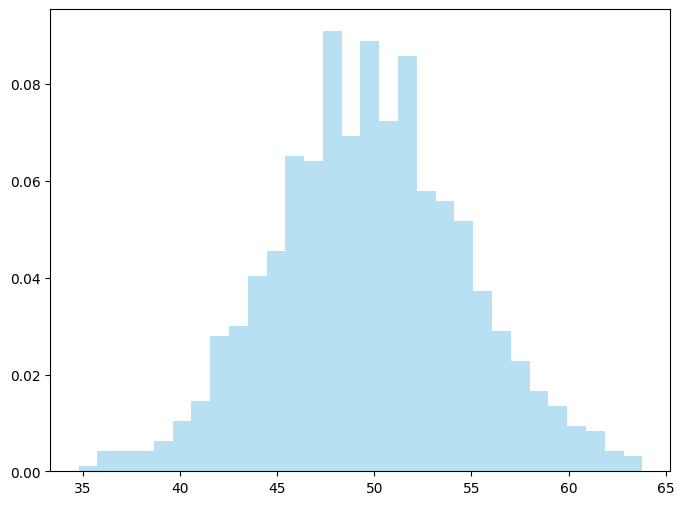

In [291]:
# 3. 히스토그램 시각화

plt.figure(figsize=(8, 6))
count, bins, ignored = plt.hist(weights, bins=30, density=True, alpha=0.6, color='skyblue', label='Weights')


#matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None,
#                        edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>,
#                        clear=False, **kwargs)[source]
# Create a new figure, or activate an existing figure.

#matplotlib.pyplot.hist(x, bins=None, *, range=None, density=False, weights=None, cumulative=False, bottom=None,
#                       histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None,
#                       label=None, stacked=False, data=None, **kwargs)

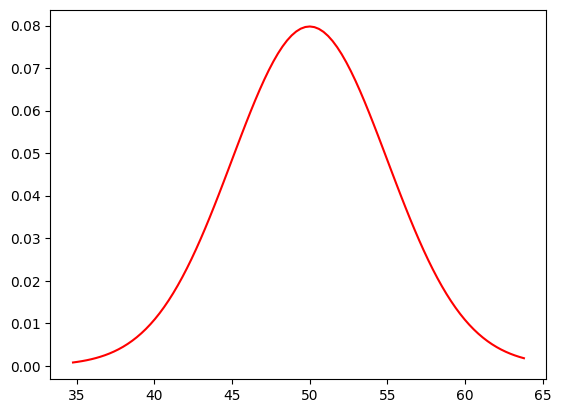

In [292]:
# 4. 정규분포 곡선 추가
x = np.linspace(min(weights), max(weights), 100)

pdf = stats.norm.pdf(x, loc=50, scale=5)

plt.plot(x, pdf, 'r-', label='PDF')

#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0, *, device=None)[source]
#norm = <scipy.stats._continuous_distns.norm_gen object>[source]  A normal continuous random variable.

<ipython-input-293-551b363699a8>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


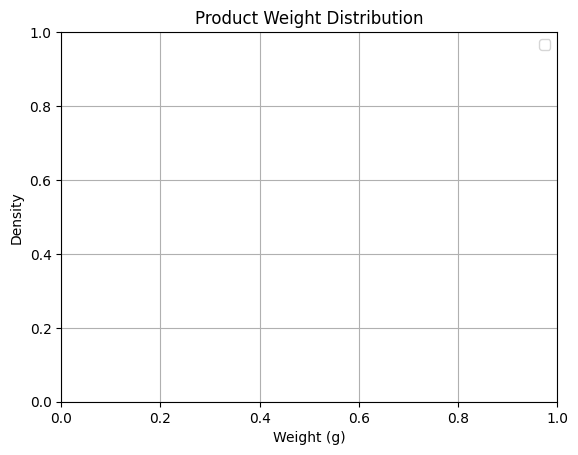

In [293]:
# 5. 라벨 및 제목
plt.title("Product Weight Distribution")
plt.xlabel("Weight (g)")
plt.ylabel("Density")

plt.legend()
plt.grid(True)
plt.show()


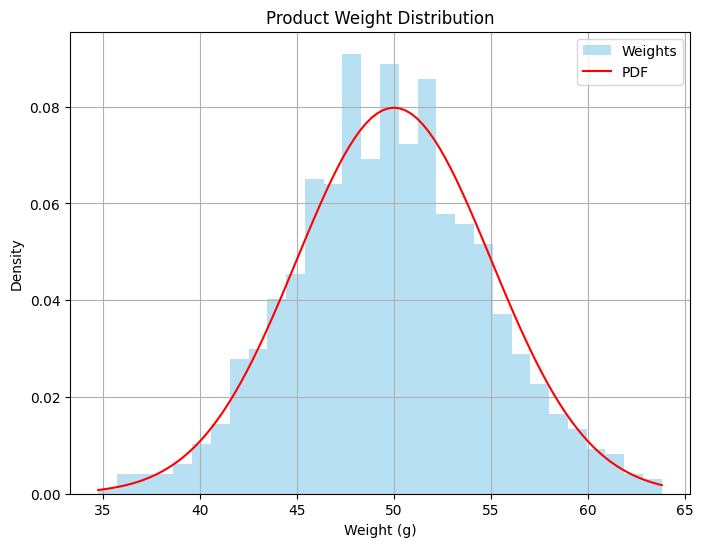

In [294]:
# 3. 히스토그램 시각화
plt.figure(figsize=(8, 6))
count, bins, ignored = plt.hist(weights, bins=30, density=True, alpha=0.6, color='skyblue', label='Weights')

# 4. 정규분포 곡선 추가
x = np.linspace(min(weights), max(weights), 100)
pdf = stats.norm.pdf(x, loc=50, scale=5)
plt.plot(x, pdf, 'r-', label='PDF')

# 5. 라벨 및 제목
plt.title("Product Weight Distribution")
plt.xlabel("Weight (g)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()